# Multiple Linear Regression using Python
In this notebook we will solve a Multiple Linear Regression problem using Python programming language. In order to do this we will use some commonly used libraries for solving machine learning tasks, these includes Pandas, Numpy, Matplotlib and Scikit-learn.

## Task 1:

Suppose we want to determine the price per unit area of a house in a dataset of historical purchases made in an area in which we have multiple features such as __*transaction_number, transaction_date, house_age, distance_to_nearest_bus_station, number_of_convenience_stores, latitude, and longitude.*__


The objective of this task is to train a ML regression model that can accurately predict the price per unit area of a given house.

![alt text](img/real_estate.jpg "Real Estate")

### Step 1: Importing Libraries for our task

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2. Reading the data from the provided file
Since the data is in a CSV format, we are going to read this file using the pandas's read_csv method

In [2]:
df = pd.read_csv('dataset/03-real_estate_dataset.csv')

### 3. Exploring the data 
Let us explore the data 

In [3]:
df.shape

(414, 8)

In [4]:
df.head()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.describe()

,number,transaction_date,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


After exploring our data, we can use our intuition, to drop some of the features that might have no contribution to our model

In [6]:
df = df.drop('number', axis=1)
df = df.drop('transaction_date', axis=1)
df.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude,unit_area_price
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


### 4. Splitting the data into training and test sets

In [7]:
X = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [8]:
X.head()

,house_age,distance_to_nearest_bus_station,number_of_convenience_stores,latitude,longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### 5. Building the model to fit the training data

In [10]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### 6. Using the model to make predictions for the test data set 

In [11]:
y_pred = model.predict(X_test)

In [12]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = -1194.2145132626354
w = [-2.65600030e-01 -4.74964456e-03  1.13434674e+00  2.28565503e+02
 -3.67741638e+01]


### 7. Evaluating our model performance

In [13]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 66.75
Coefficient of determination: 0.58


We can use our model to make different kinds of predictions as follows

In [14]:
data = {
'house_age':[32.0],
'distance_to_nearest_bus_station': [84.87882],
'number_of_convenience_stores':[10],
'latitude':[24.98298],
'longitude':[121.54024],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[48.93331686]


## Task 2
The aim of this task is to build a model which predicts sales based on the money spent on different platforms such as TV, radio, and newspaper for marketing by using Simple Linear Regression and Multiple Linear Regression. The dataset contains the following features ***TV, Radio, Newspaper*** and the target column is ***Sales*** 

Hint: _For Simple Linear Regression, select the feature with the highest correlation with the target column._

Compare the Mean Squared error and Coefficient of determination for both models

### sales prediction multiple linear regression

In [2]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#reading data 
df = pd.read_csv('Documents/dataset/04-advertising_dataset.csv')

In [4]:
#exproling the data
df.shape

(200, 4)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
#splitting the data into train and test
x = df.iloc[:, :-1]
y = df.iloc[:,df.shape[1]-1]

In [9]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [10]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

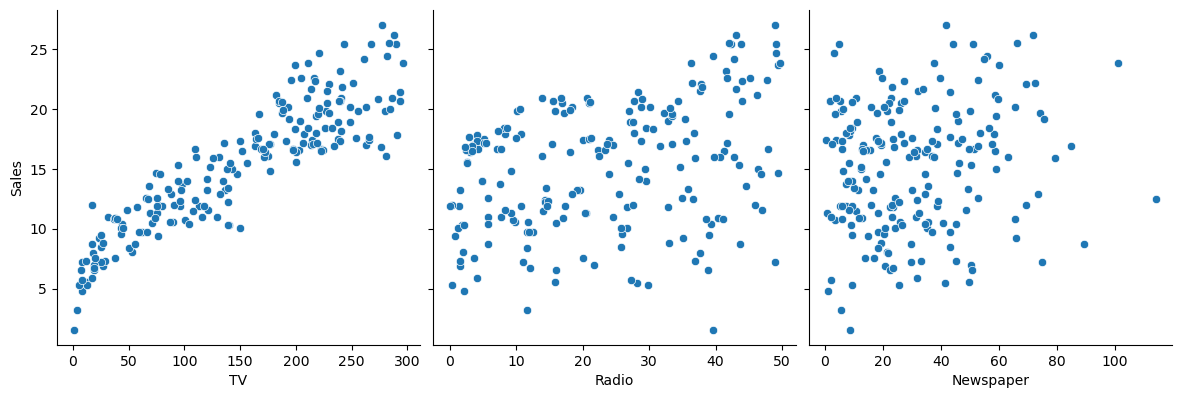

In [12]:
#data visualization to see the features distribution
import seaborn as sns

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


In [13]:
#building the model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [14]:
#making profit prediction
new_predictions = model.predict(x_test)
# Print or use the new predictions
print("Predictions on new data:", new_predictions)

Predictions on new data: [17.04041233 20.39964377 23.74740099  9.25653209 21.67525948 12.56179334
 21.07865662  8.70895483 17.28353601 16.68491851  8.92573172  8.50762572
 18.2530284   8.06003145 12.68447869 14.96677492  8.12198913 17.91906169
 11.01929198 20.4979062  20.81737524 12.58662099 10.88870324 22.39692163
  9.44183427  7.95532725 20.83706013 13.83997207 10.79282849  7.92309626
 16.00432589 10.64496918 20.79094843 10.40916722 21.61788525 21.1954234
 12.10497731 22.82970275 12.63229447  6.49245031 11.94463925 15.3638056
  9.91037996  9.48003396 17.28192106  7.25660905 10.36937236 15.25293577
 11.17116856 11.72114226]


In [15]:
print(f'b = {model.intercept_}')
print(f'w = {model.coef_}')

b = 4.741842244124566
w = [0.05461383 0.09975946 0.00430495]


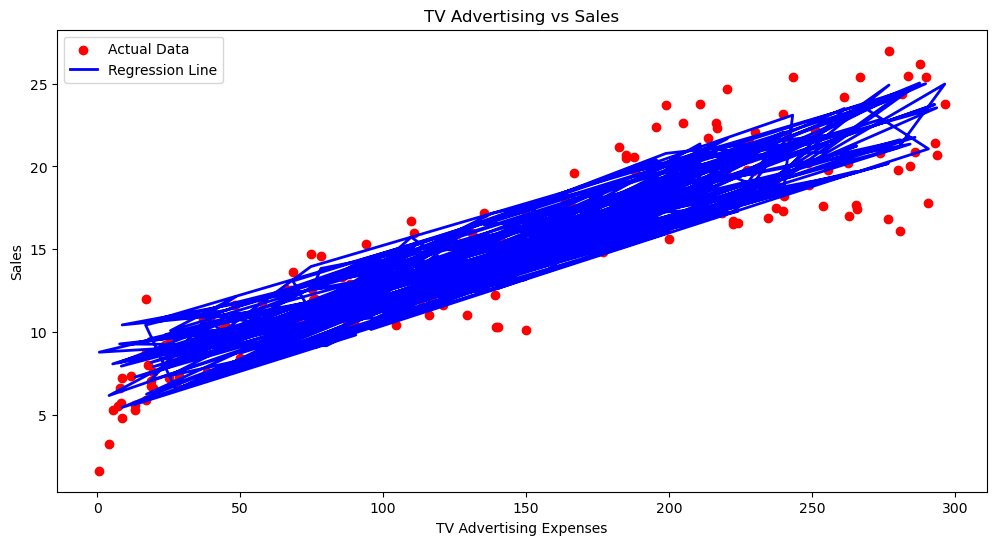

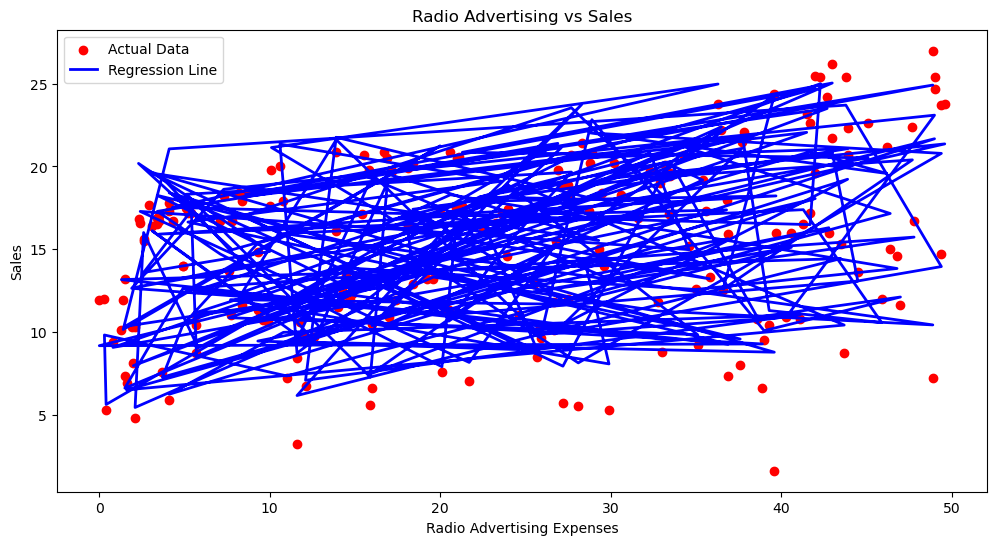

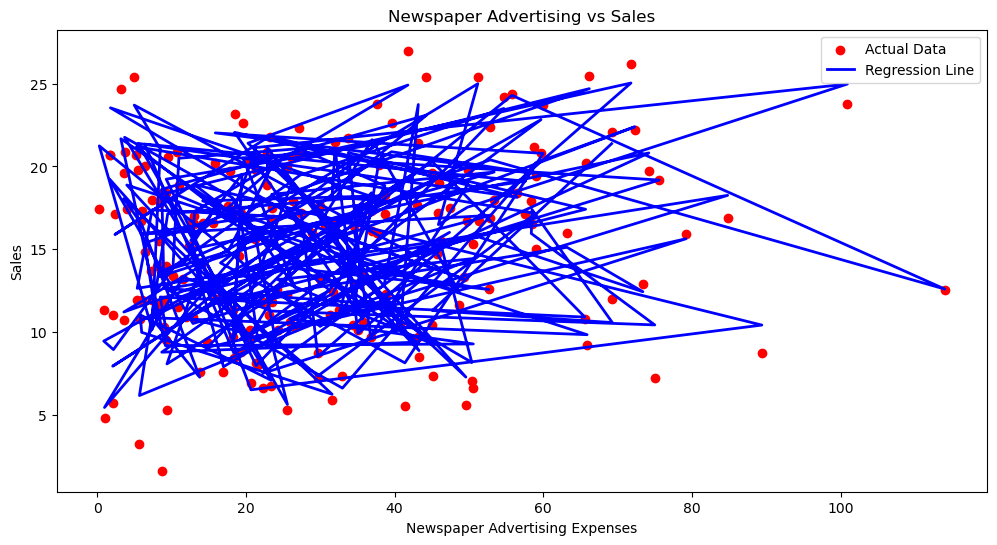

In [16]:
all_new_predictions = model.predict(x)

# Plotting TV advertising expenses
plt.figure(figsize=(12, 6))
plt.scatter(x['TV'], y, color='red', marker='o', label='Actual Data')
plt.plot(x['TV'], all_new_predictions, color='blue', linewidth=2, label='Regression Line')
plt.title('TV Advertising vs Sales')
plt.xlabel('TV Advertising Expenses')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plotting radio advertising expenses
plt.figure(figsize=(12, 6))
plt.scatter(x['Radio'], y, color='red', marker='o', label='Actual Data')
plt.plot(x['Radio'], all_new_predictions, color='blue', linewidth=2, label='Regression Line')
plt.title('Radio Advertising vs Sales')
plt.xlabel('Radio Advertising Expenses')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Plotting newspaper advertising expenses
plt.figure(figsize=(12, 6))
plt.scatter(x['Newspaper'], y, color='red', marker='o', label='Actual Data')
plt.plot(x['Newspaper'], all_new_predictions, color='blue', linewidth=2, label='Regression Line')
plt.title('Newspaper Advertising vs Sales')
plt.xlabel('Newspaper Advertising Expenses')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [17]:
#evaluating model perfomance
print("Mean squared error: %.2f" % mean_squared_error(y_test,new_predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, new_predictions))

Mean squared error: 2.40
Coefficient of determination: 0.91


In [18]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [19]:
data = {
'TV':[230.1],
'Radio': [37.8],
'Newspaper':[69.2],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[21.37729583]


#### sales prediction simple linear regression

In [20]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
#reading data 
df = pd.read_csv('Documents/dataset/04-advertising_dataset.csv')

In [22]:
#exproling the data
df.shape

(200, 4)

In [23]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


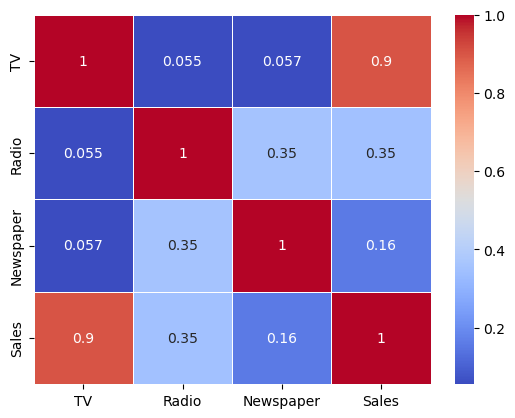

In [24]:
#data visualization to see the relationship between features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [25]:
#feature selection
x = df.iloc[:, :1]
y = df.iloc[:,df.shape[1]-1]

In [26]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [27]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [28]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
#building model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [30]:
#making profit prediction
new_predictions = model.predict(x_test)
# Print or use the new predictions
print("Predictions on new data:", new_predictions)

Predictions on new data: [16.14347417 17.92138181 23.32156857  7.74687609 19.30050643 11.25838215
 19.10665357  9.86818022 19.41681814 16.79703523  8.8435294  10.21157671
 20.08699517  7.39794095 14.82527473 16.52564123  7.50317536 18.04323218
 11.26945945 20.24761611 19.81006251 10.85406047  9.20354185 20.99533427
 10.92052431 10.06203308 18.92387802 14.81419743 11.92855917  7.56410054
 18.16508254 10.93160162 18.11523467  8.03488605 22.64585289 20.29192533
  9.77402312 22.25814718 13.5901551   8.62198328 13.52369126 16.90226964
  9.48601316 10.54943455 19.50543659  9.21461916 11.00914276 15.25728968
 12.89228481 11.32484598]


In [31]:
#evaluating model perfomance
print("Mean squared error: %.2f" % mean_squared_error(y_test,new_predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, new_predictions))

Mean squared error: 5.51
Coefficient of determination: 0.80


In [32]:
data = {
'TV':[230.1],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[19.84329443]


## Task 3:

To develop the best medical insurance products, the insurer needs access to historical data to approximate the medical costs of each user. With this data, a medical insurer can develop more accurate pricing models, plan a particular insurance outcome. For all these cases, the objective is to accurately predict insurance costs.

![alt text](img/health_insurance.jpg "Health Insurance")


#### Dataset
You are provided with a dataset in the **dataset/04-insurance_charges.csv** file that contains medical insurance records. The individual medical costs billed by health insurance are the target variable charges, and the rest of columns contain personal information such as age, gender, family status, and whether the patient smokes among other features.
The following is the description of the features contained in the dataset: 
- **age:** age of primary beneficiary
- **sex:** insurance contractor gender, female, male
- **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children:** Number of children covered by health insurance / Number of dependents
- **smoker:** Smoking
- **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges:** Individual medical costs billed by health insurance

#### Use Case
The objective is to train a ML regression model that can accurately predict the insurance costs for a given individual



### insurance outcome prediction model multiple linear regression

In [71]:
#Importing Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
#reading data 
data = pd.read_csv('Documents/dataset/05-insurance_charges.csv')

In [73]:
#exploring the data
data.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [74]:
data.shape

(1338, 7)

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [76]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [77]:
#feature engeneering
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])


In [79]:
# feature scalling by using minmaxscaler method
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data['age'] = scaler.fit_transform(data['age'].values.reshape(-1,1))
data['bmi'] = scaler.fit_transform(data['bmi'].values.reshape(-1,1))
data['charges'] = scaler.fit_transform(data['charges'].values.reshape(-1,1))

In [80]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.321227,0,1,3,0.251611
1,0.000000,1,0.479150,1,0,2,0.009636
2,0.217391,1,0.458434,3,0,2,0.053115
3,0.326087,1,0.181464,0,0,1,0.333010
4,0.304348,1,0.347592,0,0,1,0.043816


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(3), int32(3), int64(1)
memory usage: 57.6 KB


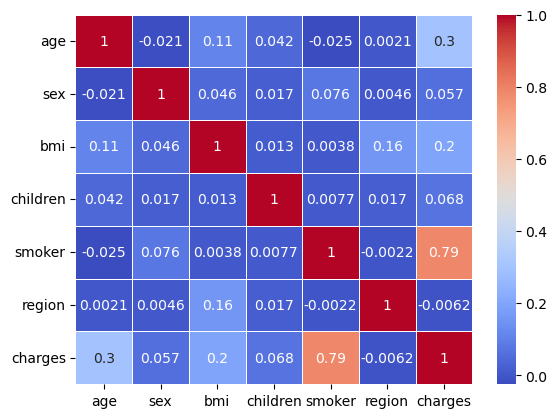

In [82]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [83]:
data=data.drop('region', axis=1)

In [84]:
#feature selection
x = data.iloc[:, :-1]
y = data.iloc[:,data.shape[1]-1]

In [85]:
x.head

<bound method NDFrame.head of            age  sex       bmi  children  smoker
0     0.021739    0  0.321227         0       1
1     0.000000    1  0.479150         1       0
2     0.217391    1  0.458434         3       0
3     0.326087    1  0.181464         0       0
4     0.304348    1  0.347592         0       0
...        ...  ...       ...       ...     ...
1333  0.695652    1  0.403820         3       0
1334  0.000000    0  0.429379         0       0
1335  0.000000    0  0.562012         0       0
1336  0.065217    0  0.264730         0       0
1337  0.934783    0  0.352704         0       1

[1338 rows x 5 columns]>

In [86]:
y.head

<bound method NDFrame.head of 0       0.251611
1       0.009636
2       0.053115
3       0.333010
4       0.043816
          ...   
1333    0.151299
1334    0.017305
1335    0.008108
1336    0.014144
1337    0.447249
Name: charges, Length: 1338, dtype: float64>

In [87]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [88]:
#building model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [89]:
#evaluating model perfomance
new_predictions = model.predict(x_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,new_predictions))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, new_predictions))

Mean squared error: 0.01
Coefficient of determination: 0.77


In [90]:
data.head()

,age,sex,bmi,children,smoker,charges
0,0.021739,0,0.321227,0,1,0.251611
1,0.000000,1,0.479150,1,0,0.009636
2,0.217391,1,0.458434,3,0,0.053115
3,0.326087,1,0.181464,0,0,0.333010
4,0.304348,1,0.347592,0,0,0.043816


In [92]:
#making predictions
data = {
'age':[0.021739],
'sex':[0],
'bmi':[0.321227],
'children':[0],
'smoker':[1],
}

data = pd.DataFrame(data)
val = model.predict(data)
print(val)

[0.38764165]
